<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session9/FinalS9code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-8ek9m30p
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-8ek9m30p
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=69177 sha256=5ea385b6ea567bd6fd205d1c94e38a816b9d8fbe5fa2910d39b05a5a529b4fd0
  Stored in directory: /tmp/pip-ephem-wheel-cache-mxcu382j/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


In [3]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [7]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/eva5/Session9/Template'
sys.path.append(folder)


In [8]:
%matplotlib inline
import torch
import train_test_loader
import show_images
import model
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms
from GradCam import GradCAM,visualize_cam

In [9]:
import albumentations as A

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
train_transform = AlbumentationTransforms([
                                       A.Rotate((-30.0, 30.0)),
                                       A.HorizontalFlip(),
                                       A.RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
                                       A.Normalize(mean=channel_means, std=channel_stdevs),
                                       A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1) 
                                       ])
# Test Phase transformations
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])


In [10]:
classes, trainloader, testloader = train_test_loader.load(train_transform,test_transform)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


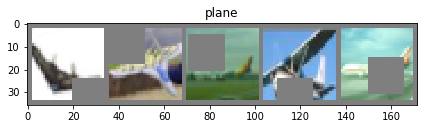

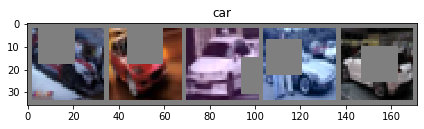

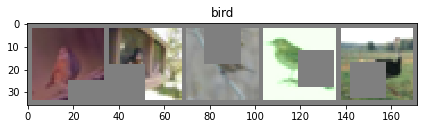

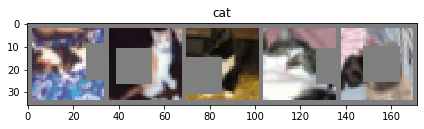

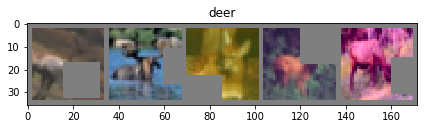

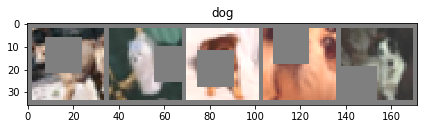

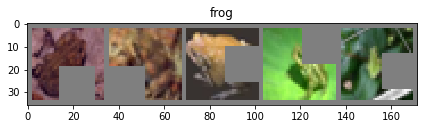

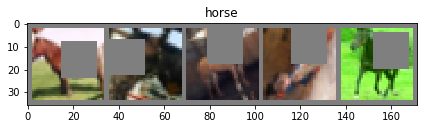

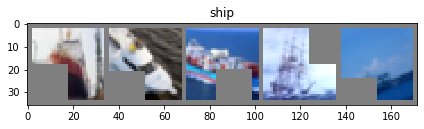

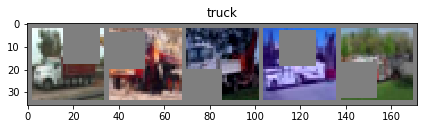

In [11]:
show_images.show_train_data(trainloader, classes)

In [12]:
import model
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.ResNet18(dropout=0.1).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [14]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR , MultiStepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9,weight_decay=0.0005)
scheduler = StepLR(optimizer, step_size=12, gamma=0.1)

In [15]:
test_loss = []
test_acc = []
EPOCHS = 40
#best_acc1 = 10
for epoch in range(EPOCHS):
     print("EPOCH:", epoch+1,'LR:',optimizer.param_groups[0]['lr'])
     train_test.train(model, device, trainloader, optimizer, criterion, epoch)
     scheduler.step()
     test_loss , test_acc = train_test.test(model, device, criterion, testloader)
    #  is_best = test_acc[-1] > best_acc1

    #  best_acc1 = max(test_acc[-1], best_acc1)
    #  save_checkpoint({
    #         'epoch': epoch + 1,
            
    #         'state_dict': model.state_dict(),
    #         'best_acc1': best_acc1,
    #         'optimizer' : optimizer.state_dict(),
    #     }, is_best)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.1


Loss=1.848952054977417 Batch_id=390 Accuracy=19.51: 100%|██████████| 391/391 [01:01<00:00,  6.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0145, Accuracy: 3165/10000 (31.65%)

EPOCH: 2 LR: 0.1


Loss=1.9330905675888062 Batch_id=390 Accuracy=33.14: 100%|██████████| 391/391 [01:06<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 4213/10000 (42.13%)

EPOCH: 3 LR: 0.1


Loss=1.532802939414978 Batch_id=390 Accuracy=39.66: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 4956/10000 (49.56%)

EPOCH: 4 LR: 0.1


Loss=1.3778278827667236 Batch_id=390 Accuracy=46.63: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 5860/10000 (58.60%)

EPOCH: 5 LR: 0.1


Loss=1.0914136171340942 Batch_id=390 Accuracy=53.08: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 5642/10000 (56.42%)

EPOCH: 6 LR: 0.1


Loss=1.165758490562439 Batch_id=390 Accuracy=57.63: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6414/10000 (64.14%)

EPOCH: 7 LR: 0.1


Loss=1.0453827381134033 Batch_id=390 Accuracy=60.88: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6672/10000 (66.72%)

EPOCH: 8 LR: 0.1


Loss=1.1332204341888428 Batch_id=390 Accuracy=63.20: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 6946/10000 (69.46%)

EPOCH: 9 LR: 0.1


Loss=0.9931157827377319 Batch_id=390 Accuracy=64.77: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 6861/10000 (68.61%)

EPOCH: 10 LR: 0.1


Loss=1.03773832321167 Batch_id=390 Accuracy=65.76: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 6791/10000 (67.91%)

EPOCH: 11 LR: 0.1


Loss=1.0564323663711548 Batch_id=390 Accuracy=66.55: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7155/10000 (71.55%)

EPOCH: 12 LR: 0.1


Loss=0.863909900188446 Batch_id=390 Accuracy=67.72: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7490/10000 (74.90%)

EPOCH: 13 LR: 0.010000000000000002


Loss=0.8532478213310242 Batch_id=390 Accuracy=73.89: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8246/10000 (82.46%)

EPOCH: 14 LR: 0.010000000000000002


Loss=0.7140853404998779 Batch_id=390 Accuracy=76.13: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8316/10000 (83.16%)

EPOCH: 15 LR: 0.010000000000000002


Loss=0.544346272945404 Batch_id=390 Accuracy=76.94: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8402/10000 (84.02%)

EPOCH: 16 LR: 0.010000000000000002


Loss=0.5284639596939087 Batch_id=390 Accuracy=77.53: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8441/10000 (84.41%)

EPOCH: 17 LR: 0.010000000000000002


Loss=0.5441813468933105 Batch_id=390 Accuracy=78.13: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8478/10000 (84.78%)

EPOCH: 18 LR: 0.010000000000000002


Loss=0.6356326341629028 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8483/10000 (84.83%)

EPOCH: 19 LR: 0.010000000000000002


Loss=0.5144518613815308 Batch_id=390 Accuracy=79.10: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8522/10000 (85.22%)

EPOCH: 20 LR: 0.010000000000000002


Loss=0.5350048542022705 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8533/10000 (85.33%)

EPOCH: 21 LR: 0.010000000000000002


Loss=0.5701648592948914 Batch_id=390 Accuracy=79.70: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8498/10000 (84.98%)

EPOCH: 22 LR: 0.010000000000000002


Loss=0.4856937825679779 Batch_id=390 Accuracy=80.13: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8559/10000 (85.59%)

EPOCH: 23 LR: 0.010000000000000002


Loss=0.5029017925262451 Batch_id=390 Accuracy=80.69: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8509/10000 (85.09%)

EPOCH: 24 LR: 0.010000000000000002


Loss=0.6695057153701782 Batch_id=390 Accuracy=80.80: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8630/10000 (86.30%)

EPOCH: 25 LR: 0.0010000000000000002


Loss=0.563338041305542 Batch_id=390 Accuracy=82.30: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8748/10000 (87.48%)

EPOCH: 26 LR: 0.0010000000000000002


Loss=0.41856640577316284 Batch_id=390 Accuracy=82.83: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8755/10000 (87.55%)

EPOCH: 27 LR: 0.0010000000000000002


Loss=0.6474605798721313 Batch_id=390 Accuracy=83.12: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8795/10000 (87.95%)

EPOCH: 28 LR: 0.0010000000000000002


Loss=0.41580748558044434 Batch_id=390 Accuracy=83.20: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8779/10000 (87.79%)

EPOCH: 29 LR: 0.0010000000000000002


Loss=0.40427136421203613 Batch_id=390 Accuracy=83.57: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8820/10000 (88.20%)

EPOCH: 30 LR: 0.0010000000000000002


Loss=0.610308825969696 Batch_id=390 Accuracy=83.55: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8852/10000 (88.52%)

EPOCH: 31 LR: 0.0010000000000000002


Loss=0.47286978363990784 Batch_id=390 Accuracy=83.68: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8821/10000 (88.21%)

EPOCH: 32 LR: 0.0010000000000000002


Loss=0.4350166916847229 Batch_id=390 Accuracy=83.66: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8810/10000 (88.10%)

EPOCH: 33 LR: 0.0010000000000000002


Loss=0.4643736779689789 Batch_id=390 Accuracy=83.99: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8849/10000 (88.49%)

EPOCH: 34 LR: 0.0010000000000000002


Loss=0.5518449544906616 Batch_id=390 Accuracy=84.14: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8848/10000 (88.48%)

EPOCH: 35 LR: 0.0010000000000000002


Loss=0.3874356150627136 Batch_id=390 Accuracy=84.24: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8852/10000 (88.52%)

EPOCH: 36 LR: 0.0010000000000000002


Loss=0.46278947591781616 Batch_id=390 Accuracy=84.46: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8843/10000 (88.43%)

EPOCH: 37 LR: 0.00010000000000000003


Loss=0.3896629214286804 Batch_id=390 Accuracy=84.54: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8871/10000 (88.71%)

EPOCH: 38 LR: 0.00010000000000000003


Loss=0.5895217657089233 Batch_id=390 Accuracy=84.56: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8844/10000 (88.44%)

EPOCH: 39 LR: 0.00010000000000000003


Loss=0.35893696546554565 Batch_id=390 Accuracy=84.80: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8844/10000 (88.44%)

EPOCH: 40 LR: 0.00010000000000000003


Loss=0.3843754827976227 Batch_id=390 Accuracy=84.59: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]



Test set: Average loss: 0.0026, Accuracy: 8873/10000 (88.73%)



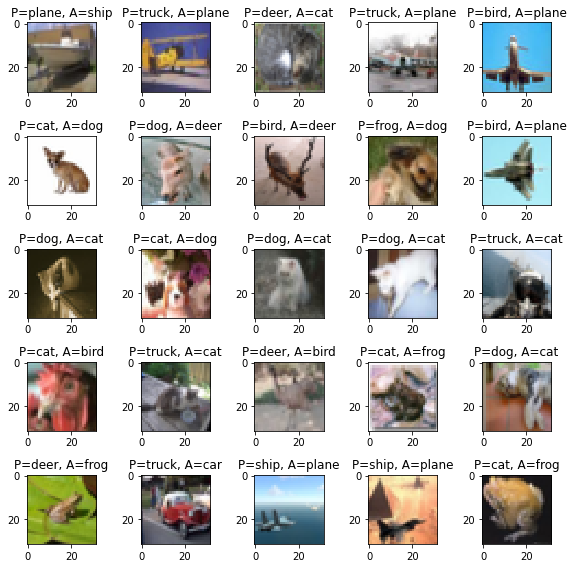

In [16]:
evaluate.show_misclassified_images(model, device, testloader, classes)

In [17]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 88 %


In [18]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 89 %
Accuracy of   car : 96 %
Accuracy of  bird : 85 %
Accuracy of   cat : 75 %
Accuracy of  deer : 86 %
Accuracy of   dog : 80 %
Accuracy of  frog : 90 %
Accuracy of horse : 92 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %


Text(0.5, 1.0, 'Test Accuracy')

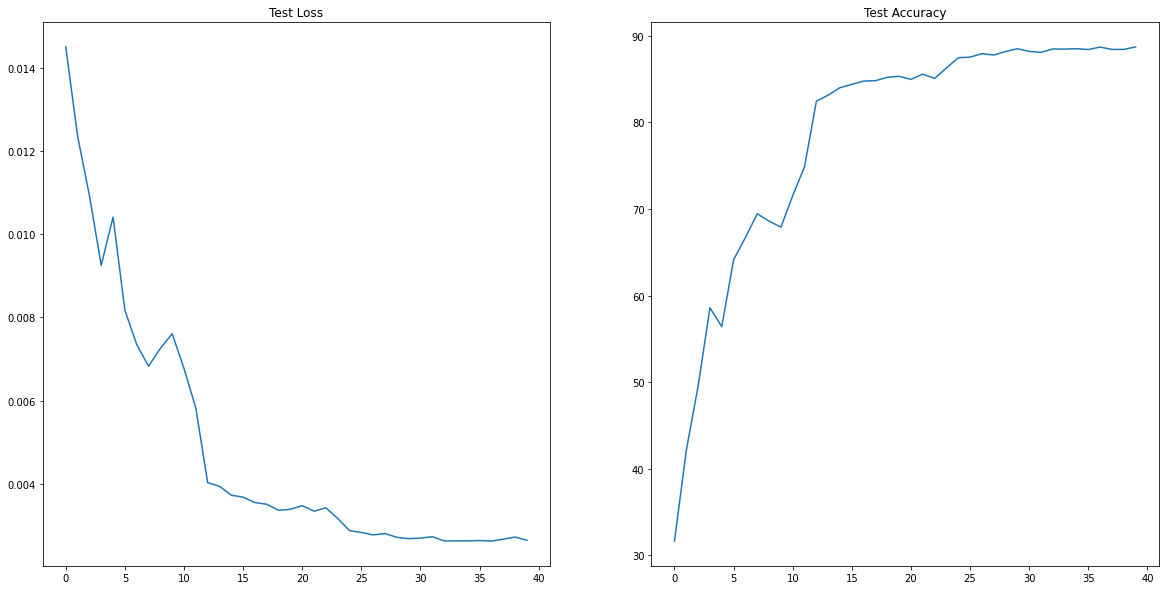

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].plot(test_loss)
axs[0].set_title("Test Loss")


axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")



In [20]:
import shutil
def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

In [30]:
import PIL
img_name =[sys.path[-1]+'/images/cat.jpg',sys.path[-1]+'/images/dog.jpg',sys.path[-1]+'/images/bird.jpg',sys.path[-1]+'/images/truck.jpg',sys.path[-1]+'/images/car.jpg']

pil_image = []
for i,img in enumerate(img_name):
   pil_image.append(PIL.Image.open(img))

In [31]:
from torchvision import transforms
normed_torch_img = []
torch_img_list = []

for i in pil_image:
  torch_img = transforms.Compose([
      transforms.Resize((32, 32)),
      transforms.ToTensor()
  ])(i).to(device)
  torch_img_list.append(torch_img)
  normed_torch_img .append(transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])(torch_img)[None])

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img,c = "" ):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
    plt.title(c)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


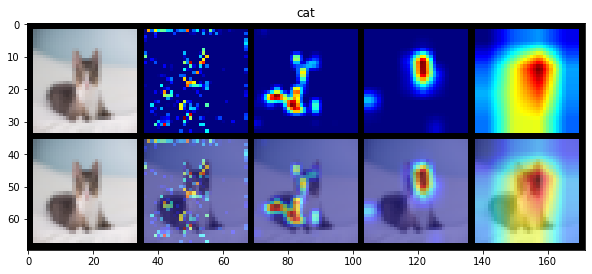

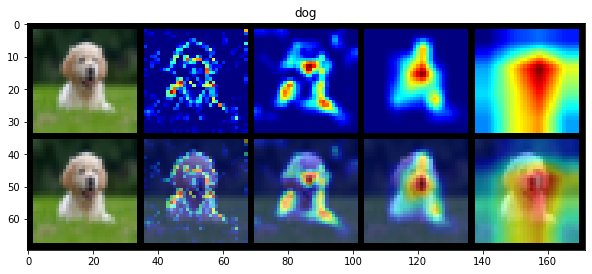

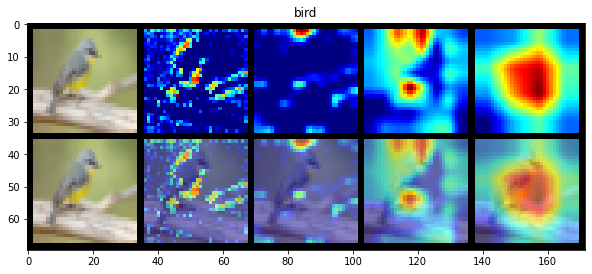

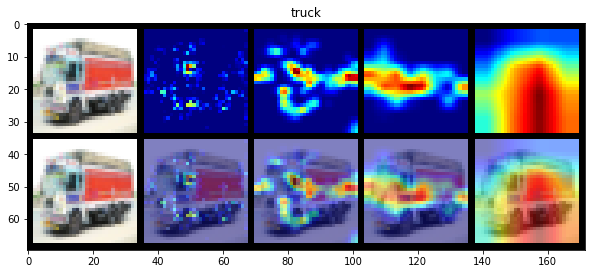

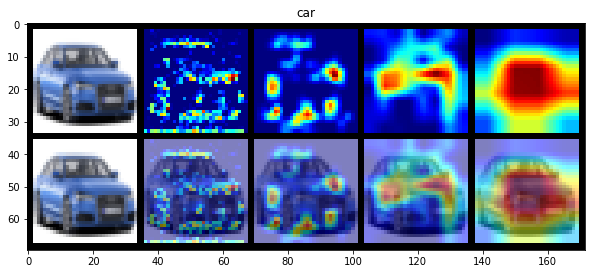

In [33]:
import copy
from torchvision.utils import make_grid, save_image
for i,k in enumerate(normed_torch_img):
  images1 = [torch_img_list[i].cpu()]
  images2 =  [torch_img_list[i].cpu()]
  b = copy.deepcopy(model.to(device))
  output = model(normed_torch_img[i])
  _, predicted = torch.max(output.data, 1)
  #print(classes[int(predicted)])
  layers =  [b.layer1,b.layer2,b.layer3,b.layer4]
  for j in layers:
    g = GradCAM(b,j)
    mask, _= g(normed_torch_img[i])
    heatmap, result = visualize_cam(mask,torch_img_list[i] )
    images1.extend([heatmap])
    images2.extend([result])
  grid_image = make_grid(images1+images2,nrow=5)
  imshow(grid_image,c = classes[int(predicted)])
  